In [1]:
#Read wide table from one drive
widecsv=read.csv("Fig. 4I.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%14 >= 5 & i%%14 < 9){
    tallcsv[i,3] <- "Two"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%14 >= 9 | i%%14 == 0){
    tallcsv[i,3] <- "Three"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Fig. 4I_tall.csv", row.names = FALSE)



       VALUE           Treatment Trial
1   3.094830    X01.DMSO_WT_DAI0   One
2   3.571952    X01.DMSO_WT_DAI0   One
3   3.793800    X01.DMSO_WT_DAI0   One
4         NA    X01.DMSO_WT_DAI0   One
5   3.793800    X01.DMSO_WT_DAI0   Two
6   3.997920    X01.DMSO_WT_DAI0   Two
7   3.872982    X01.DMSO_WT_DAI0   Two
8         NA    X01.DMSO_WT_DAI0   Two
9   3.094830    X01.DMSO_WT_DAI0 Three
10  3.298950    X01.DMSO_WT_DAI0 Three
11  3.325279    X01.DMSO_WT_DAI0 Three
12        NA    X01.DMSO_WT_DAI0 Three
13        NA    X01.DMSO_WT_DAI0 Three
14        NA    X01.DMSO_WT_DAI0 Three
15  3.793800   X02.Maya1_WT_DAI0   One
16  3.395860   X02.Maya1_WT_DAI0   One
17  3.696890   X02.Maya1_WT_DAI0   One
18        NA   X02.Maya1_WT_DAI0   One
19  3.997920   X02.Maya1_WT_DAI0   Two
20  3.997920   X02.Maya1_WT_DAI0   Two
21  4.208774   X02.Maya1_WT_DAI0   Two
22        NA   X02.Maya1_WT_DAI0   Two
23  3.240958   X02.Maya1_WT_DAI0 Three
24  3.208774   X02.Maya1_WT_DAI0 Three
25  3.049073   X02.Maya1_

In [3]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [4]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Fig. 4I_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

         Treatment    VALUE Trial
1 X01.DMSO_WT_DAI0 3.094830   One
2 X01.DMSO_WT_DAI0 3.571952   One
3 X01.DMSO_WT_DAI0 3.793800   One
4 X01.DMSO_WT_DAI0 3.793800   Two
5 X01.DMSO_WT_DAI0 3.997920   Two
6 X01.DMSO_WT_DAI0 3.872982   Two


[1] 156 157

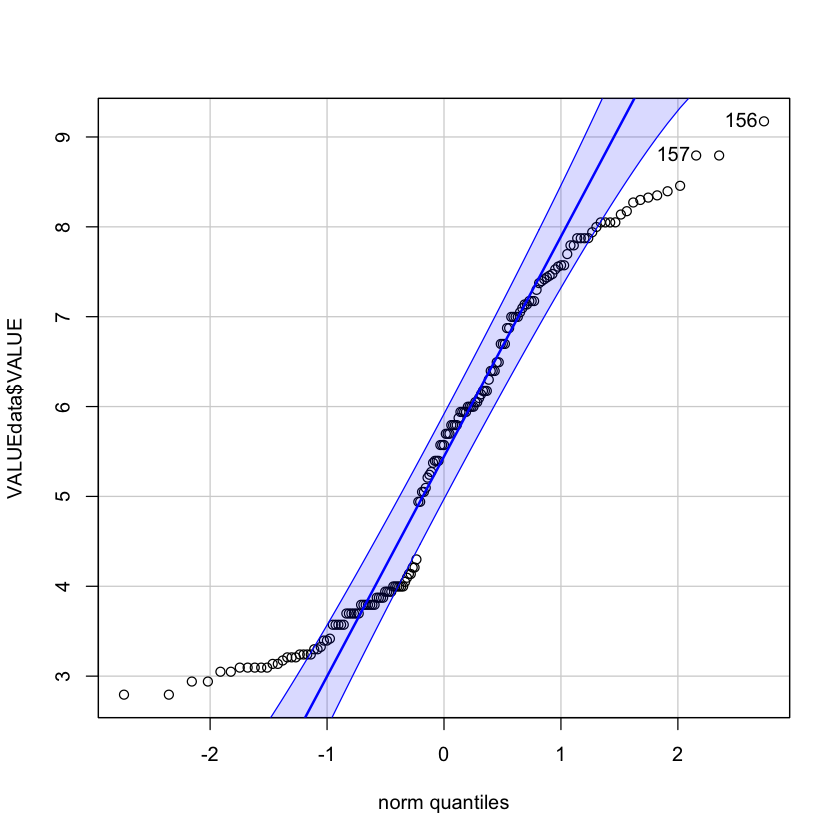

In [5]:
#Normal distribution
qqp(VALUEdata$VALUE, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


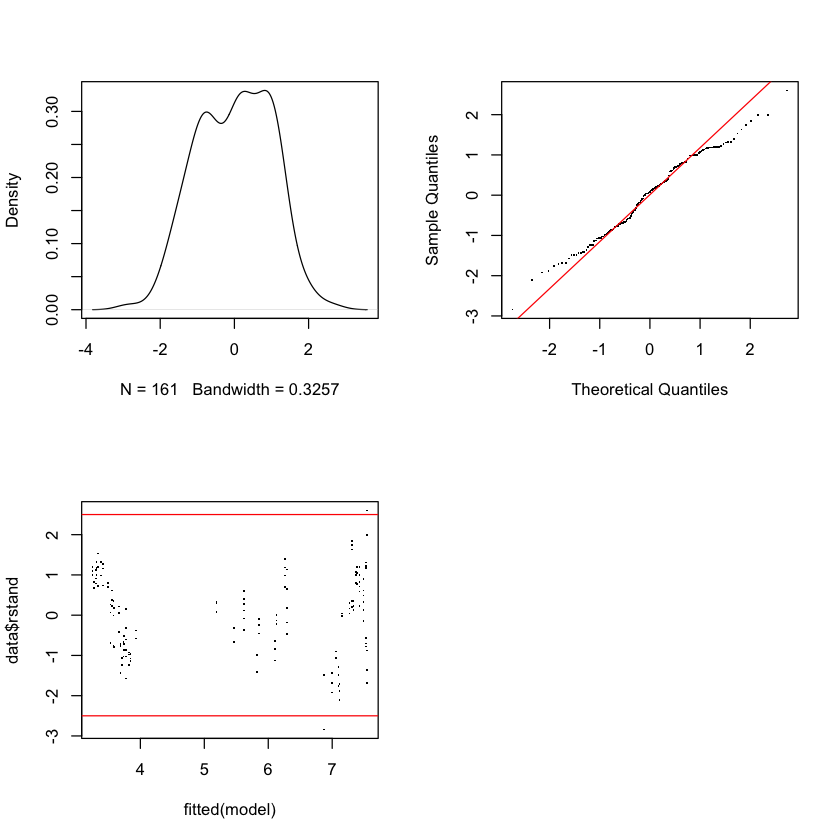

In [6]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUE.lmm<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUE.lmm)

In [7]:
#If the above looks good, then we can get the model characteristics
summary(VALUE.lmm)


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUE ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
   348.6    404.1   -156.3    312.6      143 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.83005 -0.77121  0.08158  0.79535  2.58963 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.03859  0.1965  
 Residual             0.39463  0.6282  
Number of obs: 161, groups:  Trial, 3

Fixed effects:
                              Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                    3.53826    0.23814  36.13375  14.858  < 2e-16
TreatmentX02.Maya1_WT_DAI0     0.08285    0.29613 158.04416   0.280    0.780
TreatmentX03.Maya2_WT_DAI0    -0.02226    0.29613 158.04416  -0.075    0.940
TreatmentX04.flg22_WT_DAI0     0.04144    0.33290 158.75771   0.124    0.901
TreatmentX05.DMSO_fls2_DAI0    0.19700    0.29613 158.044

In [8]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result, alpha=0.1)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF        DenDF          F value     
 Min.   :428.8   Min.   :28.59   Min.   :15   Min.   :158.2   Min.   :72.45  
 1st Qu.:428.8   1st Qu.:28.59   1st Qu.:15   1st Qu.:158.2   1st Qu.:72.45  
 Median :428.8   Median :28.59   Median :15   Median :158.2   Median :72.45  
 Mean   :428.8   Mean   :28.59   Mean   :15   Mean   :158.2   Mean   :72.45  
 3rd Qu.:428.8   3rd Qu.:28.59   3rd Qu.:15   3rd Qu.:158.2   3rd Qu.:72.45  
 Max.   :428.8   Max.   :28.59   Max.   :15   Max.   :158.2   Max.   :72.45  
     Pr(>F)         
 Min.   :8.771e-63  
 1st Qu.:8.771e-63  
 Median :8.771e-63  
 Mean   :8.771e-63  
 3rd Qu.:8.771e-63  
 Max.   :8.771e-63  


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


   X01.DMSO_WT_DAI0   X02.Maya1_WT_DAI0   X03.Maya2_WT_DAI0   X04.flg22_WT_DAI0 
                "a"                 "a"                 "a"                 "a" 
 X05.DMSO_fls2_DAI0 X06.Maya1_fls2_DAI0 X07.Maya2_fls2_DAI0 X08.flg22_fls2_DAI0 
                "a"                 "a"                 "a"                 "a" 
   X09.DMSO_WT_DAI3   X10.Maya1_WT_DAI3   X11.Maya2_WT_DAI3   X12.flg22_WT_DAI3 
                "b"                 "c"                 "c"                 "c" 
 X13.DMSO_fls2_DAI3 X14.Maya1_fls2_DAI3 X15.Maya2_fls2_DAI3 X16.flg22_fls2_DAI3 
                "b"                 "b"                 "b"                 "b" 


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUE ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                                               Estimate Std. Error z value
X02.Maya1_WT_DAI0 - X01.DMSO_WT_DAI0 == 0       0.08285    0.29613   0.280
X03.Maya2_WT_DAI0 - X01.DMSO_WT_DAI0 == 0      -0.02226    0.29613  -0.075
X04.flg22_WT_DAI0 - X01.DMSO_WT_DAI0 == 0       0.04144    0.33290   0.124
X05.DMSO_fls2_DAI0 - X01.DMSO_WT_DAI0 == 0      0.19700    0.29613   0.665
X06.Maya1_fls2_DAI0 - X01.DMSO_WT_DAI0 == 0    -0.04737    0.29613  -0.160
X07.Maya2_fls2_DAI0 - X01.DMSO_WT_DAI0 == 0     0.01024    0.29613   0.035
X08.flg22_fls2_DAI0 - X01.DMSO_WT_DAI0 == 0     0.10988    0.33290   0.330
X09.DMSO_WT_DAI3 - X01.DMSO_WT_DAI0 == 0        3.75533    0.27744  13.536
X10.Maya1_WT_DAI3 - X01.DMSO_WT_DAI0 == 0       2.52316    0.27744   9.094
X11.Maya2_WT_DAI3 - X01.DMSO_WT_DAI0 =